In [1]:
import numpy as np
import matplotlib.pyplot as plt
import mylibrary.nnlib as tnn
import copy

from mpl_toolkits.mplot3d import Axes3D
import matplotlib

In [2]:
num_points = 50
X1 = np.linspace(-2.5, 1.5, num_points)
X2 = np.linspace(-2, 4, num_points)
X1, X2 = np.meshgrid(X1, X2)
Y = np.sin(np.sqrt(X1**2 + X2**2))*2-1.

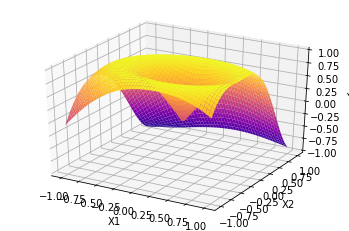

In [3]:
####Scaling the data to range -1,1
X1 = 2*(X1 - X1.min())/(X1.max() - X1.min()) -1
X2 = 2*(X2 - X2.min())/(X2.max() - X2.min()) -1
Y = 2*(Y - Y.min())/(Y.max() - Y.min()) -1

x1 = X1.reshape(-1)
x2 = X2.reshape(-1)

xx = np.c_[x1, x2]
yy = Y.reshape(-1,1)

%matplotlib inline
fig = plt.figure()
ax = fig.gca(projection='3d')
# ax.scatter(X1, X2, Y)
ax.plot_surface(X1, X2, Y, cmap='plasma')
ax.set_xlabel('X1')
ax.set_ylabel('X2')
ax.set_zlabel('Y')
plt.show()

In [4]:
optim = tnn.Adam(0.01)
net = tnn.AutoForm(new_layers=True)
linear1 = tnn.WeightsLayer(2, 5, optimizer=optim)
bn1 = tnn.BatchNormalization(5, optimizer=optim)
# bias1 = tnn.BiasLayer(5, optimizer=optim)
relu1 = tnn.Relu()
linear2 = tnn.WeightsLayer(5, 5, optimizer=optim)
bn2 = tnn.BatchNormalization(5, optimizer=optim)
# bias2 = tnn.BiasLayer(5, optimizer=optim)
relu2 = tnn.Relu()
linear3 = tnn.LinearLayer(5, 1, optimizer=optim)

In [5]:
%matplotlib tk
fig = plt.figure()
ax = fig.gca(projection='3d')

for epoch in range(100000):

    yout = net.forward(xx)
    dy = yout - yy
    dx = net.backward(dy)
    net.update()
    
    if epoch%100 == 0:
        
        error = (dy**2).mean()
        print(epoch, 'Error = ', error)
        ax.clear()
        
        ax.scatter(X1, X2, Y)
        ax.scatter(X1, X2, yout.reshape(-1), color='r', marker='.')
        ax.set_xlabel('X1')
        ax.set_ylabel('X2')
        ax.set_zlabel('Y')
        
        fig.canvas.draw()
        plt.pause(0.01)
        print("\n")
        if error < 0.00025:
            print('fitted to our expectation')
            break

0 Error =  2.192489233552195


1000 Error =  0.003656119667520643


2000 Error =  0.002069244481977359


3000 Error =  0.0018706867885590799


4000 Error =  0.0018497588543651517


5000 Error =  0.0017949765908653191


6000 Error =  0.0017710669854244404


TclError: invalid command name "."

In [6]:
print(linear1.weights)

[[ 0.35497181  0.00997038  2.0946342  -0.81962159  0.1809175 ]
 [ 0.25173119 -0.91603804 -1.71552255  0.69988365  1.03070502]]


In [9]:
print(bn1.mean)
print(bn1.std_inv)
print(bn1.multiplier.multiplier)
print(bn1.adder.bias)

[-2.71782596e-17  4.92939023e-17 -3.14415161e-17  2.17603713e-17
 -8.76632100e-17]
[3.90140277 1.85325471 0.62705547 1.57526299 1.6223635 ]
[[1.07055117 0.85050446 0.98730572 1.01928942 1.0073724 ]]
[-0.00801053 -0.50184127  0.10150145  0.72556281 -0.17410425]


In [10]:
print(linear2.weights)

[[-1.01600195  0.04495093 -0.17199576 -0.46935376  1.09756917]
 [-2.28685799  0.63008552 -0.12892593 -0.8524991  -0.55195603]
 [-0.00609249  1.329657    0.57287683  0.14686894 -0.11839872]
 [-1.31748578  1.13032391 -0.38314512 -0.36095365  0.36413233]
 [-0.37456464  1.29095437  0.37947665  0.21938914 -0.5643677 ]]


In [11]:
print(bn2.mean)
print(bn2.std_inv)
print(bn2.multiplier.multiplier)
print(bn2.adder.bias)

[-2.09649197  2.17030006 -0.03536132 -0.51298866  0.45766482]
[1.00127065 1.06913506 1.9621592  4.30107895 1.76155652]
[[1.01747286 0.47181    0.43611486 1.14726476 0.73822511]]
[ 1.70360005  0.01967559 -0.41936891 -0.38787383 -0.62930042]


In [12]:
print(linear3.weights)

[[ 0.48845014]
 [-0.6875712 ]
 [ 1.0063338 ]
 [-0.61367984]
 [-0.36143805]]


/home/tsuman/Program_Files/Python/miniconda3/lib/python3.7/site-packages/ipykernel_launcher.py:6: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  


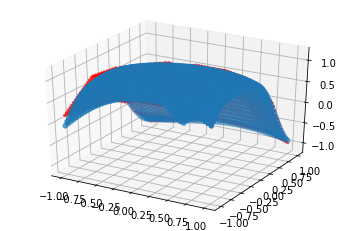

In [14]:
%matplotlib inline
fig = plt.figure()
ax = fig.gca(projection='3d')
ax.scatter(X1, X2, Y)
ax.scatter(X1, X2, yout.reshape(-1), color='r', marker='.')
fig.show()

In [15]:
linear1.weights@linear1.weights.T

array([[ 5.2181075 , -3.90033515],
       [-3.90033515,  5.39770186]])

In [16]:
linear2.weights@linear2.weights.T

array([[ 2.48881413,  2.16826356, -0.23145737,  2.02435194, -0.34908409],
       [ 2.16826356,  6.67475931,  0.71801686,  3.88122858,  1.74554053],
       [-0.23145737,  0.71801686,  2.13180146,  1.19534922,  2.03524379],
       [ 2.02435194,  3.88122858,  1.19534922,  3.42308099,  1.52259171],
       [-0.34908409,  1.74554053,  2.03524379,  1.52259171,  2.31750687]])